In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import os

In [3]:
df = pd.read_csv('./data/train.csv')

In [4]:
df.shape

(404290, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
print(df.loc[0]['question1'])
print(df.loc[0]['question2'])
print('IS DUPLICATE: ', df.loc[0]['is_duplicate'])

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?
IS DUPLICATE:  0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


- All values are non-null (no missing values)

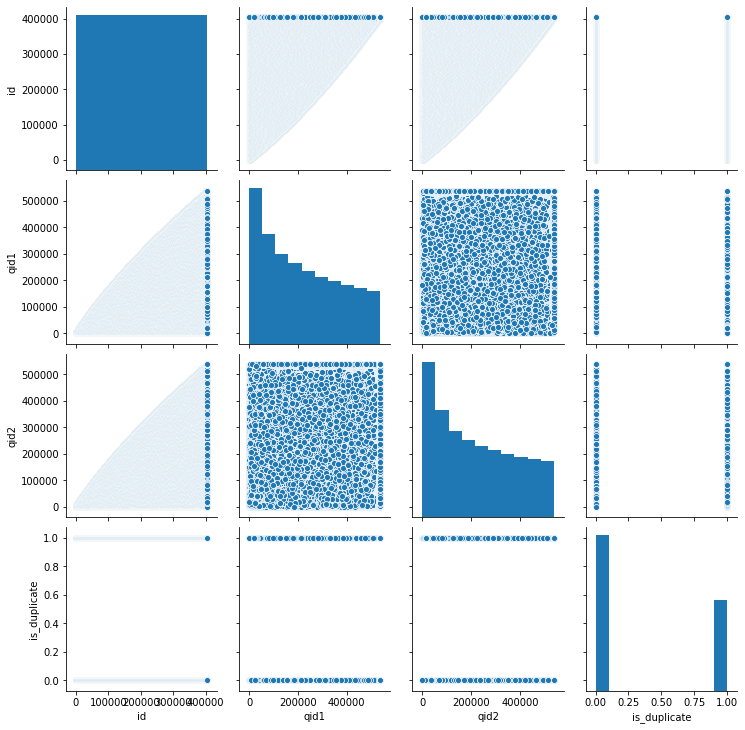

In [7]:
sns.pairplot(df)

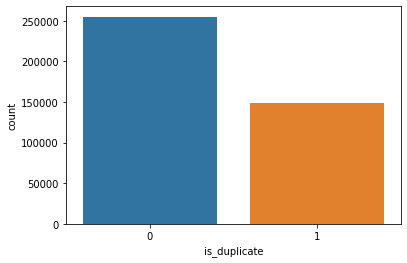

In [8]:
sns.countplot(x='is_duplicate',data=df)
plt.show()

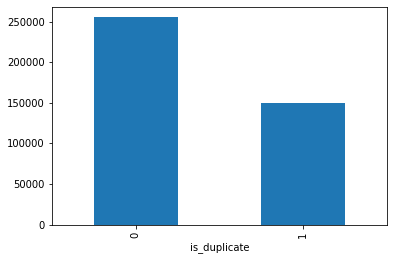

In [9]:
df.groupby('is_duplicate')['id'].count().plot.bar()
plt.show()

In [10]:
df['qid1'].nunique()

290654

In [11]:
df['qid2'].nunique()

299364

In [12]:
df['qid1'].nunique() + df['qid2'].nunique()

590018

- means questions are repeating 

In [47]:
df['qid1'].value_counts()

8461      50
14110     48
25984     47
20628     47
1749      47
          ..
415339     1
411241     1
413288     1
409190     1
524288     1
Name: qid1, Length: 290654, dtype: int64

In [49]:
df['qid2'].value_counts()

30782     120
2559      115
4044      100
2561       71
17978      66
         ... 
99475       1
105616      1
85130       1
525311      1
288755      1
Name: qid2, Length: 299364, dtype: int64

# EDA of new features

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./df_fe_without_preprocessing_train.csv')

In [7]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


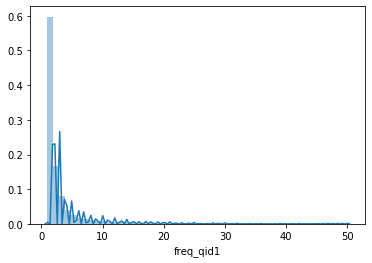

In [8]:
sns.distplot(df['freq_qid1'])

## min length of a ques

In [9]:
print('Min length of ques 1:',min(df['q1_n_words']))
print('Min length of ques 2:',min(df['q2_n_words']))

print('Number of questions with min length in q1 and q2 respectively:',sum(df['q1_n_words']==1),sum(df['q2_n_words']==1))


Min length of ques 1: 0
Min length of ques 2: 0
Number of questions with min length in q1 and q2 respectively: 69 25


## word-share

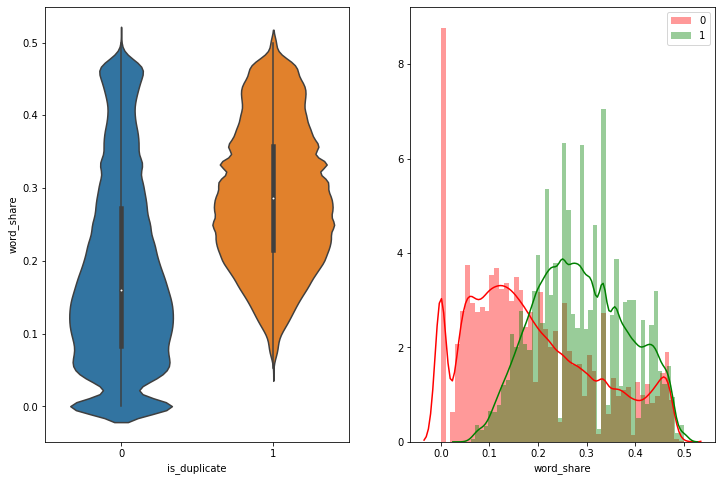

In [39]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate',y='word_share',data=df)

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate']==0.0]['word_share'],label="0",color='red')
sns.distplot(df[df['is_duplicate']==1.0]['word_share'],label="1",color='green')
plt.legend()
plt.show()

In [ ]:
 df['word']

## word-common

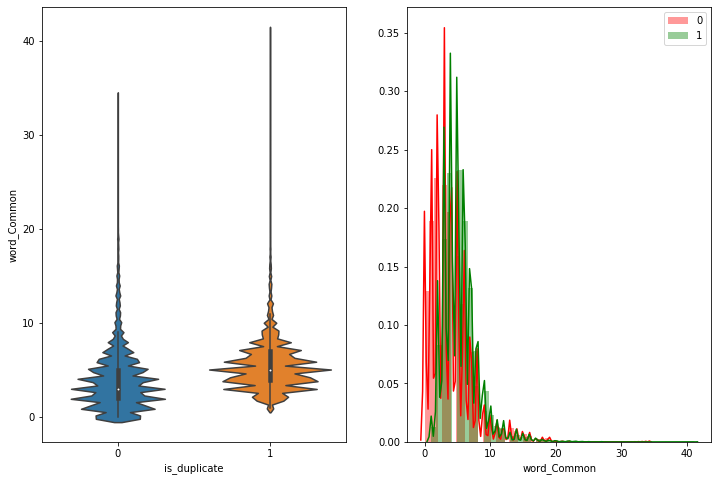

In [41]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate',y='word_Common',data=df)

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate']==0.0]['word_Common'],label="0",color='red')
sns.distplot(df[df['is_duplicate']==1.0]['word_Common'],label="1",color='green')
plt.legend()
plt.show()

In [ ]:
df['freq_q1+q2']

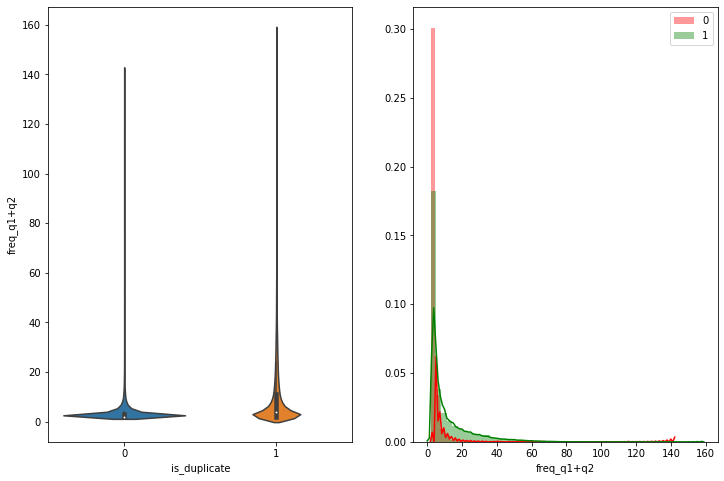

In [42]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate',y='freq_q1+q2',data=df)

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate']==0.0]['freq_q1+q2'],label="0",color='red')
sns.distplot(df[df['is_duplicate']==1.0]['freq_q1+q2'],label="1",color='green')
plt.legend()
plt.show()

# Advanced Features

- Scores lie in between 0 to 100.
- **fuzzy_ratio**: The simplest way to compare two strings is with a measurement of edit distance(add,shift,delete operations).
    We have 2 strings **"NEW YORK METS"** and **"NEW YORK MEATS"**, these strings look very similar. (looks like it is a typo error)
    fuzzy_ratio() will give a score of 96
    
    But it is far too sensitive for minor differnces in word order,missing words or extra words
    
    **Partial String Similarity:** 
    - **"YANKEES"** and **NEW YORK YANKEES** --> fuzz-ratio()= 60
    - **NEW YORK METS** and **NEW YORK YANKEES**--> fuzz-ratio= 75
    - this is because number of edits in 2nd example is less than number of examples in 1st. But the scores should be exactly opposite. As yankees and new york yankees are the same thing, while in 2nd example we are talking about 2 different teams.


- **fuzz-partial-ratio():** to solve the above mentioned problem we will look for perfect matches of partial strings.
    - fuzz.partial_ratio("YANKEES", "NEW YORK YANKEES") ⇒ 100
    - fuzz.partial_ratio("NEW YORK METS", "NEW YORK YANKEES") ⇒ 69
    - as Yankees match is a perfect substring in New York Yankees while in 2nd only **new york** mathces.


- **OUT OF ORDER:**
    - fuzz.ratio("New York Mets vs Atlanta Braves", "Atlanta Braves vs New York Mets") ⇒ 45
    - fuzz.partial_ratio("New York Mets vs Atlanta Braves", "Atlanta Braves vs New York Mets") ⇒ 45
    - It is clear that in these 2 examples we are talking about the same match. To solve this issue, will use token sort and token set.
       
    - **Token-sort**: take a sentence, break it into individual words and sort them alphabetically.
        - "new york mets vs atlanta braves"   →→  "atlanta braves mets new vs york"
        - fuzz.token_sort_ratio("New York Mets vs Atlanta Braves", "Atlanta Braves vs New York Mets") ⇒ 100

- **Token-Set ratio**:
    - s1 = "mariners vs angels"
    - s2 = "los angeles angels of anaheim at seattle mariners"
    - using token-sort method isn't helpful because 2nd string has more words than 1st. We would end up comparing:
        - s1 = "mariners vs angels"
        - s2 = "los angeles angels of anaheim at seattle mariners"
    - construct these pairs:
        - t0 = [SORTED_INTERSECTION]
        - t1 = [SORTED_INTERSECTION] + [SORTED_REST_OF_STRING1]
        - t2 = [SORTED_INTERSECTION] + [SORTED_REST_OF_STRING2]
        
    - t0 = "angels mariners"
    - t1 = "angels mariners vs"
    - t2 = "angels mariners anaheim angeles at los of seattle"
    - fuzz.ratio(t0, t1) ⇒ 90   (Pick the maximum)
    - fuzz.ratio(t0, t2) ⇒ 46
    - fuzz.ratio(t1, t2) ⇒ 50
    - fuzz.token_set_ratio("mariners vs angels", "los angeles angels of anaheim at seattle mariners") ⇒ 90
    
    - we would not get this score using any of the three methods. 

In [47]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

In [54]:
df['question1'] = df['question1'].fillna('').apply(preprocess)
df['question2'] = df['question2'].fillna('').apply(preprocess)

## word cloud

In [29]:
import wordcloud

In [55]:
df_dup = df[df['is_duplicate']==1]
df_nondup = df[df['is_duplicate']==0]

In [19]:
duplicate_text = df_dup['question1'] + df_dup['question2']


"Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?"

In [24]:
np.dstack((df_dup['question1'],df_dup['question2']))[0][0]

array(['Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?',
       "I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?"],
      dtype=object)

In [67]:
p = np.dstack([df_dup['question1'],df_dup['question2']]).flatten()
n = np.dstack([df_nondup['question1'],df_nondup['question2']]).flatten()

In [68]:
STOPWORDS = wordcloud.STOPWORDS
print(STOPWORDS)

{'down', "it's", 'which', 'between', 'we', "wasn't", "doesn't", 'does', 'has', 'few', 'into', 'our', 'how', 'while', "when's", 'after', 'who', "why's", 'but', "we'll", 'yourselves', 'where', "how's", 'in', 'until', 'each', 'above', "he'll", 'not', "shan't", 'only', "you've", "here's", 'ought', 'your', "isn't", 'own', 'some', 'on', 'both', 'cannot', 'the', 'www', 'then', 'them', "that's", 'just', 'because', 'hence', "i'll", "mustn't", 'they', "he's", 'like', 'to', 'myself', "wouldn't", 'before', 'these', 'is', "they're", "don't", "we've", 'was', "you're", "she's", "you'll", 'when', 'any', 'over', 'those', "you'd", 'having', 'very', 'can', 'be', 'her', 'yourself', "haven't", "couldn't", 'himself', 'nor', 'had', "i'd", 'am', 'she', 'ours', "weren't", 'have', 'being', 'once', "didn't", 'i', 'out', 'with', 'since', 'this', 'or', 'its', 'yours', 'if', "hadn't", "where's", 'an', 'about', 'you', "what's", 'a', "they'll", 'against', 'k', 'and', "can't", 'more', 'no', 'do', "there's", 'should', 

In [69]:
print(sum(df['question1'].isnull()))
print(sum(df['question2'].isnull()))

0
0


In [63]:
print(p[94])
print(p[94:104])
print(p[87:94])
p[40]

why does red keep the keys in oitnb 
['why does red keep the keys in oitnb '
 'why does red keep the keys in season 4 of orange is the new black '
 'if i do not monetize youtube videos   upload copyright content  then are there chances that google may block my account '
 'how do you upload movies on youtube and monetize them  is there any issue of copyright'
 'what does the quora website look like to members of quora moderation '
 'how does quora look to a moderator '
 'why nobody answer my questions in quora '
 'why is no one answering my questions in quora '
 'what is the funniest joke you know '
 'what is the funniest joke of all time ']
['who are the rohingya people '
 'does it matter whether humans are selfish or evil '
 'does it matter whether humanity is evil or not '
 'does a black hole have mass ' 'does a black hole have a finite mass '
 'is morgan freeman correct when he says the only way to stop racism  is to stop talking about it '
 'what are your views about this morgan fr

'what is java programming  how to learn java programming language  '

In [70]:
print(p[94])
print(p[94:104])
print(p[87:94])
p[40]

why does red keep the keys in oitnb 
['why does red keep the keys in oitnb '
 'why does red keep the keys in season 4 of orange is the new black '
 'if i do not monetize youtube videos   upload copyright content  then are there chances that google may block my account '
 'how do you upload movies on youtube and monetize them  is there any issue of copyright'
 'what does the quora website look like to members of quora moderation '
 'how does quora look to a moderator '
 'why nobody answer my questions in quora '
 'why is no one answering my questions in quora '
 'what is the funniest joke you know '
 'what is the funniest joke of all time ']
['who are the rohingya people '
 'does it matter whether humans are selfish or evil '
 'does it matter whether humanity is evil or not '
 'does a black hole have mass ' 'does a black hole have a finite mass '
 'is morgan freeman correct when he says the only way to stop racism  is to stop talking about it '
 'what are your views about this morgan fr

'what is java programming  how to learn java programming language  '

#### save the np array into text file

In [74]:
np.savetxt('./data/train_p.txt', p, delimiter=' ', fmt='%s',encoding='UTF-8')

In [87]:
d = os.path.dirname('.')
text_p = open(os.path.join(d,'data/train_p.txt'),encoding='UTF-8').read()

In [96]:
def generate_wordcloud(text):
    wc = wordcloud.WordCloud(background_color='white')
    wc.generate(text)
    plt.figure(figsize=(8,7))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
    
def generate_wordcloud2(text):
    wc = wordcloud.WordCloud(background_color='white',max_words=len(text),stopwords=STOPWORDS)
    wc.generate(text)
    plt.figure(figsize=(8,7))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

array(['Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?',
       "I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",
       'How can I be a good geologist?', ...,
       'What does Jainism say about Gays and Homosexuality?',
       'Do you believe there is life after death?',
       'Is it true that there is life after death?'], dtype=object)

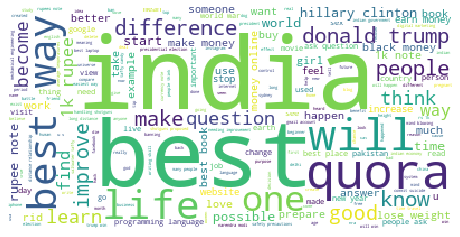

In [91]:
generate_wordcloud(text_p)

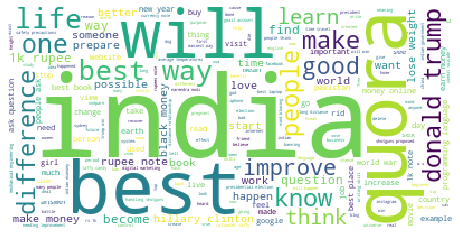

In [93]:
generate_wordcloud2(text_p)

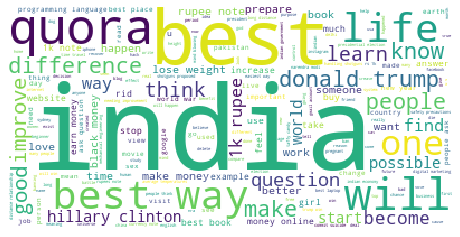

In [97]:
generate_wordcloud2(text_p)